In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

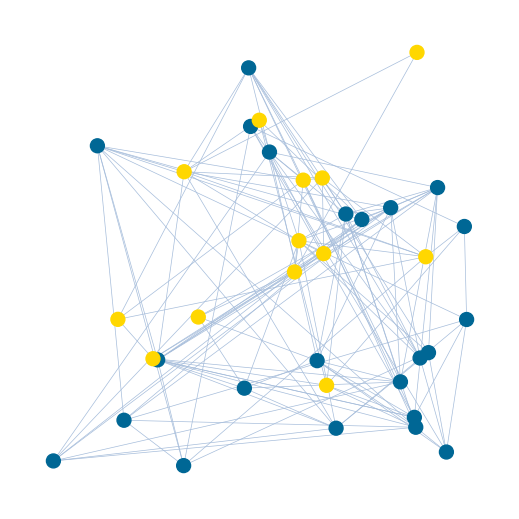

In [124]:
# Set the probability for each edge
probability = 0.2

# Node size
node_size = 100

# Set edge thickness to 1pt
edge_width = 0.5

# Set the number of nodes
num_nodes = 36

# Create a random graph with 40 nodes and a 50% chance for each edge
G = nx.erdos_renyi_graph(num_nodes, probability)

plt.figure(figsize=(5, 5))

# Draw the graph using a random layout
pos = nx.random_layout(G)

# Initialize node colors with a default color
node_colors = ['#006795'] * num_nodes

# Set 20% of the nodes to have a gold color
num_gold_nodes = int(0.075 * num_nodes)
gold_nodes = list(G.nodes())[:num_gold_nodes]
for node in gold_nodes:
    node_colors[node] = 'gold'

# Detect communities in the graph
communities = list(greedy_modularity_communities(G))

# Find the community that contains the golden nodes
gold_community = None
for community in communities:
    if any(node in community for node in gold_nodes):
        gold_community = community
        break

# Set the color of nodes in the gold community to 'gold'
for node in gold_community:
    node_colors[node] = 'gold'

# Draw the graph with node colors
nx.draw(G, pos, with_labels=False, font_weight='normal', width=edge_width, node_size=node_size, node_color=node_colors, edge_color='#a6bddb')

# Save the plot as a PNG file
plt.savefig('HO.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

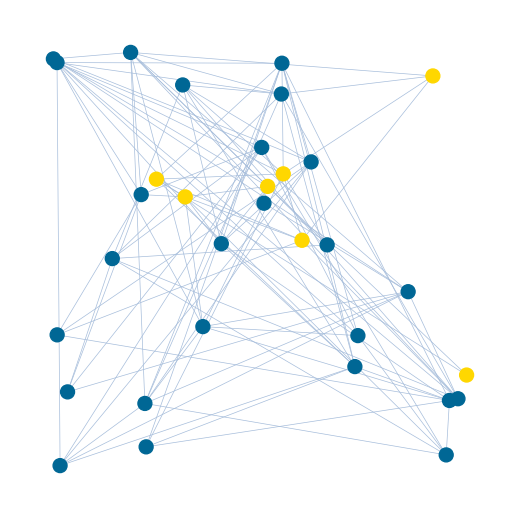

In [127]:
# LO 

# Set the probability for each edge
probability = 0.2

# Node size
node_size = 100

# Set edge thickness to 1pt
edge_width = 0.5

# Set the number of nodes
num_nodes = 32

# Create a random graph with 40 nodes and a 50% chance for each edge
G = nx.erdos_renyi_graph(num_nodes, probability)

plt.figure(figsize=(5, 5))

# Draw the graph using a random layout
pos = nx.random_layout(G)

# Initialize node colors with a default color
node_colors = ['#006795'] * num_nodes

# Set 20% of the nodes to have a gold color
num_gold_nodes = int(0.075 * num_nodes)
gold_nodes = list(G.nodes())[:num_gold_nodes]
for node in gold_nodes:
    node_colors[node] = 'gold'

# Detect communities in the graph
communities = list(greedy_modularity_communities(G))

# Find the community that contains the golden nodes
gold_community = None
for community in communities:
    if any(node in community for node in gold_nodes):
        gold_community = community
        break

# Set the color of nodes in the gold community to 'gold'
for node in gold_community:
    node_colors[node] = 'gold'

# Draw the graph with node colors
nx.draw(G, pos, with_labels=False, font_weight='normal', width=edge_width, node_size=node_size, node_color=node_colors, edge_color='#a6bddb')

# Save the plot as a PNG file
plt.savefig('LO.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()


C:\Users\gparti\AppData\Local\Temp\ipykernel_10000\778798341.py:22: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  gold_edges = random.sample(G.edges(), int(0.15 * G.number_of_edges()))


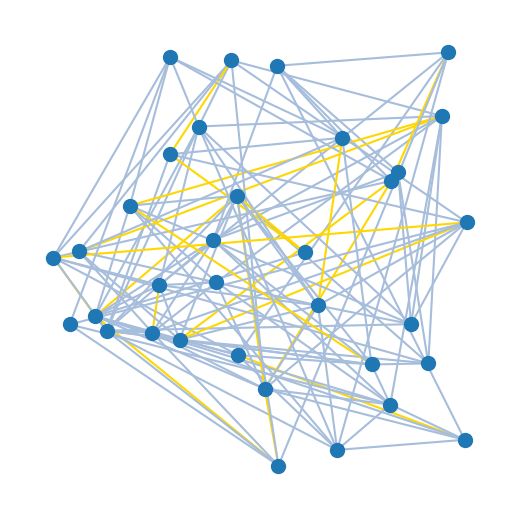

In [133]:
# Set the probability for each edge
probability = 0.2

# Node size
node_size = 100

# Set edge thickness to 1pt
edge_width = 1.5

# Set the number of nodes
num_nodes = 34

# Create a random graph with 40 nodes and a 20% chance for each edge
G = nx.erdos_renyi_graph(num_nodes, probability)

plt.figure(figsize=(5, 5))

# Draw the graph using a random layout
pos = nx.random_layout(G)

# Get 10% of edges and set their color to gold
gold_edges = random.sample(G.edges(), int(0.15 * G.number_of_edges()))
edge_colors = ['#a6bddb' if edge not in gold_edges else 'gold' for edge in G.edges()]

# Draw the graph with edge colors
nx.draw(G, pos, with_labels=False, font_weight='normal', width=edge_width, node_size=node_size, edge_color=edge_colors)

# Save the plot as a PNG file
plt.savefig('Y.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
